# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

In [22]:
import pandas as pd
import numpy as np
import plotly.express as px
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [23]:
# Your code here. 
students_data= {'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]}

In [24]:
student_df= pd.DataFrame(students_data)
student_df.head(3)

,Age,Tardies
0,17,10
1,51,1
2,27,5


Draw a dispersion diagram (scatter plot) for the data.

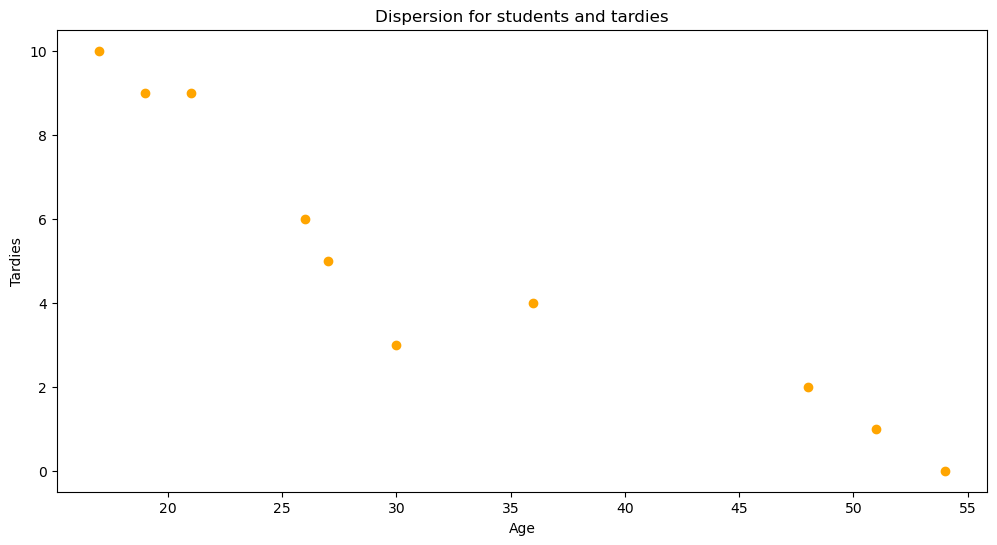

In [25]:
# Your code here
a, b= student_df["Age"], student_df["Tardies"]

plt.figure(figsize= (12, 6))
plt.title("Dispersion for students and tardies")
plt.xlabel("Age")
plt.ylabel("Tardies")
plt.scatter(a, b, color= "orange",)
plt.show()

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

*We can clearly see that this Scatterplot shows the relation (possibly as a hypothesis) between the `Age` and the `Tardies` of the students in the Dataset. This is a negative linear relation, so we can say that the more `younger` the stundents are, they tend to be more often late on class.*

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

---

Covariance formula:

$$
\text{Cov}(X, Y) = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{n - 1}
$$

In [ ]:
# your code here
# Notation taken from todays (30/10/25) class

a, b= student_df["Age"], student_df["Tardies"]

cov_matrix= np.cov(a, b)
cov_students= cov_matrix[0, 1]
print(cov_students)

-45.56666666666667


Correlation formula:

$$
r = \frac{\text{Cov}(X, Y)}{\sigma_X \sigma_Y}
$$

In [41]:
# I hard code a and b always to avoid further problems when "run all"
a, b= student_df["Age"], student_df["Tardies"]

r= np.corrcoef(a, b)[0, 1]
print(r)

-0.9391626886887122


- Covariance tell us if the data (a, b) are in the same direction and in wich direction. It can be positive or negative meaning a positive correlation or a negative one.

- Correlation tell us the standarized force of that direction. If it is 0 or near 0, the correlation will be null or nearly; 1 or -1 define if the relationship is positive or negative.

>Our relationship is negative forceful. The less the value of `Age` the more the value of `Tardies`

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [37]:
X, y= student_df[["Age"]], student_df[["Tardies"]]

X_train, X_test, y_train, y_test= tts(X, y, test_size= .2, random_state= 69)

print(f"X-shape: {X.shape} --- X_train-shape: {X_train.shape} --- X_test-shape: {X_test.shape}")
print(f"y-shape: {y.shape} --- y_train-shape: {y_train.shape} --- y_test-shape: {y_test.shape}")

X-shape: (10, 1) --- X_train-shape: (8, 1) --- X_test-shape: (2, 1)
y-shape: (10, 1) --- y_train-shape: (8, 1) --- y_test-shape: (2, 1)


In [45]:
model= LinearRegression()

model.fit(X_train, y_train)

print(model.intercept_, model.coef_)

[12.47572148] [[-0.23545579]]


$$
Tardies= 12.48 + (-0.235) · Age
$$
For a 20 years old student this will be:
$$
Tardies= 12.48 + (-0.235) · 20 = 7.2
$$

Plot your regression model on your scatter plot.

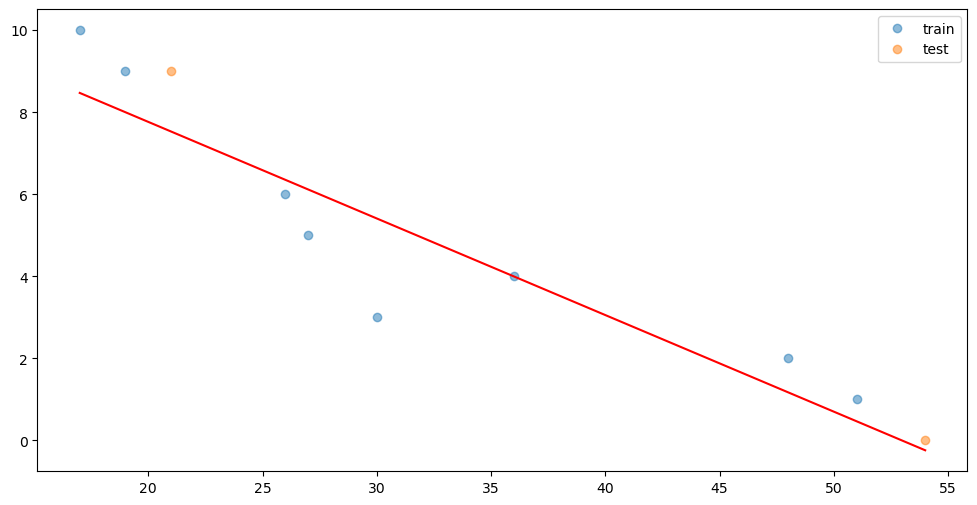

In [ ]:
# Your code here.
xmin, xmax = round(X.min().values[0]), round(X.max().values[0])

x_model = np.arange(xmin, xmax+1)
y_model = model.intercept_ + model.coef_[0] * x_model # needed to convert to scalar

plt.figure(figsize= (12, 6))
plt.plot(X_train, y_train, "o", alpha=0.5, label="train") # alpha, transparency value, between 0 (transparent) and 1 (opaque).
plt.plot(X_test, y_test, "o", alpha=0.5, label="test") # alpha, transparency value, between 0 (transparent) and 1 (opaque).
plt.plot(x_model, y_model,'r'); 

plt.legend()
plt.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

*We can not say `Age` is a good predictor of tardiness, but it can be implied to. Make such an asumption only while having `ONE` variable to analyze is not enough to proof our hypothesis, but we can certainly say `Age` is a good `indicator` of tardiness on students*

>$Tardies= 12.48 + (-0.235) · Age$

*Our formula actually says that, per every year `far from 0`, the tardiness decreases in `0.235` times*

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [55]:
# Import any libraries you may need & the data
vehicles_path= "../vehicles.csv"
vehicles_data= pd.read_csv(vehicles_path)

In [56]:
vehicles_df= pd.DataFrame(vehicles_data)
vehicles_df.head(1)

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [60]:
# Your code here.
features= ["Year", "Cylinders", "Fuel Barrels/Year", "Combined MPG", "Fuel Cost/Year"]
outcome_var= "CO2 Emission Grams/Mile"

In [57]:
def covariance(a, b):
  cov_matrix= np.cov(a, b)
  return cov_matrix[0, 1]

def correlation(a, b):
  return np.corrcoef(a, b)[0, 1]

In [67]:
for f in features:
  cov=  covariance(vehicles_df[f], vehicles_df[outcome_var])
  corr= correlation(vehicles_df[f], vehicles_df[outcome_var])
  print(f"{f} vs {outcome_var} ----> Cov: {cov:.2f}, Corr: {corr:.2f}")

Year vs CO2 Emission Grams/Mile ----> Cov: -266.93, Corr: -0.22
Cylinders vs CO2 Emission Grams/Mile ----> Cov: 157.24, Corr: 0.75
Fuel Barrels/Year vs CO2 Emission Grams/Mile ----> Cov: 524.53, Corr: 0.99
Combined MPG vs CO2 Emission Grams/Mile ----> Cov: -563.78, Corr: -0.93
Fuel Cost/Year vs CO2 Emission Grams/Mile ----> Cov: 56185.98, Corr: 0.93


In [68]:
def scatter_plot_corr(a, b, x_label=None, y_label=None):
  plt.figure(figsize= (12, 6))
  plt.scatter(a, b, color="orange", alpha=0.7)
  plt.title(f"Scatter plot of {y_label} vs {x_label}", fontsize=14)
  plt.xlabel(x_label, fontsize=12)
  plt.ylabel(y_label, fontsize=12)
  plt.grid(True, alpha=0.3)
  plt.show()

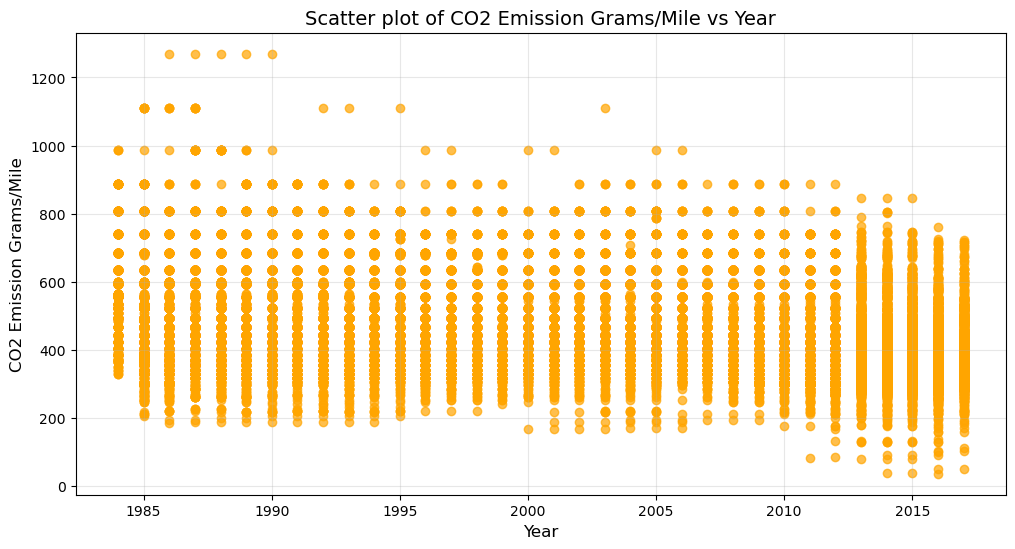

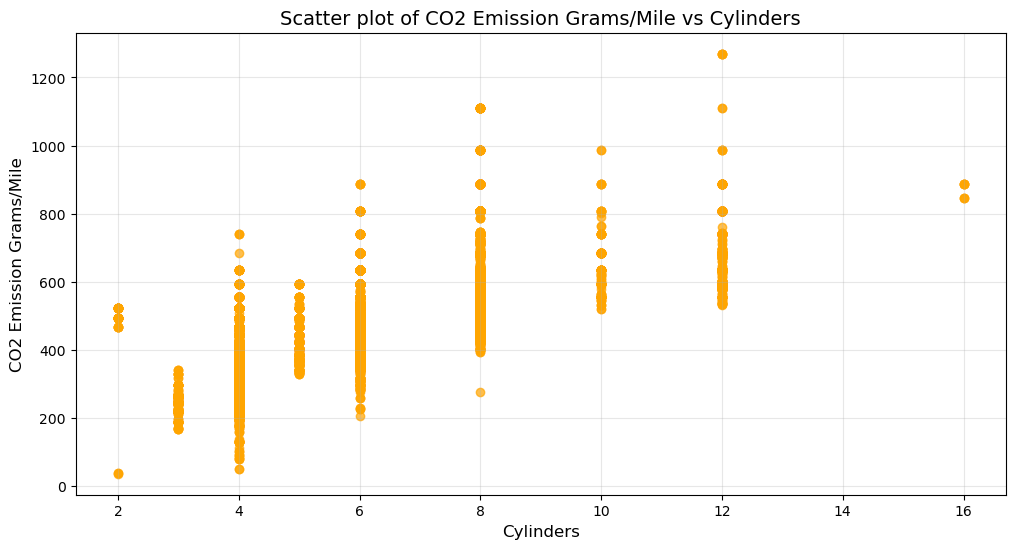

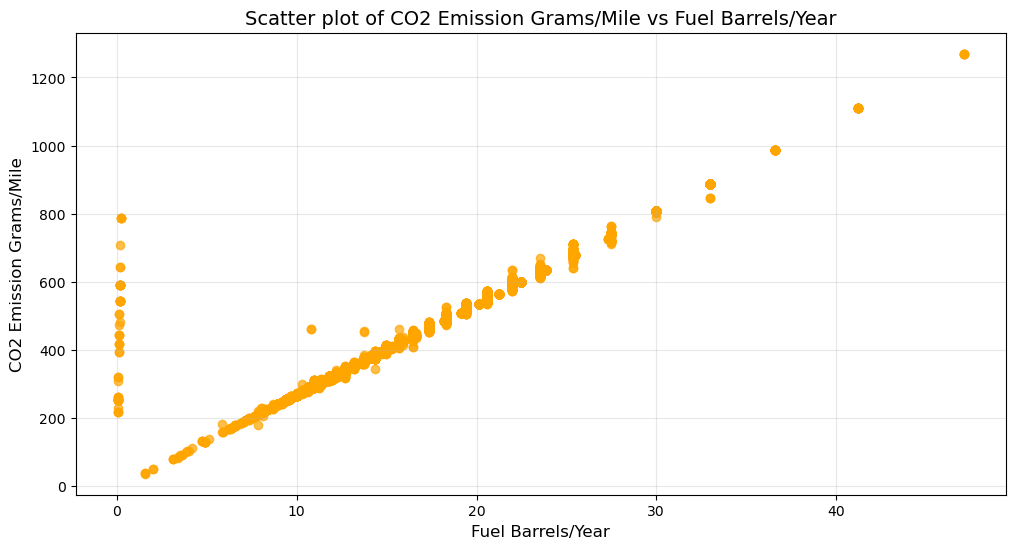

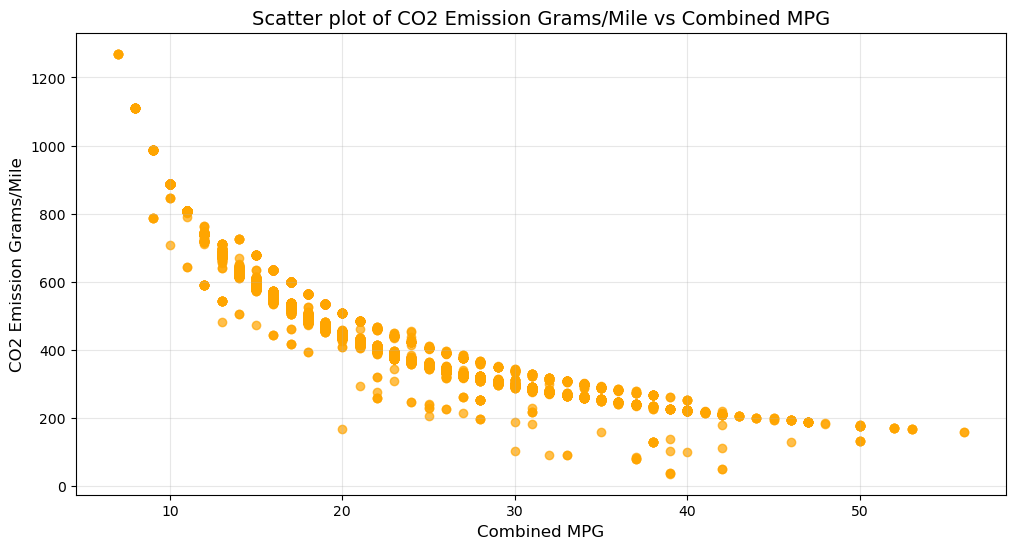

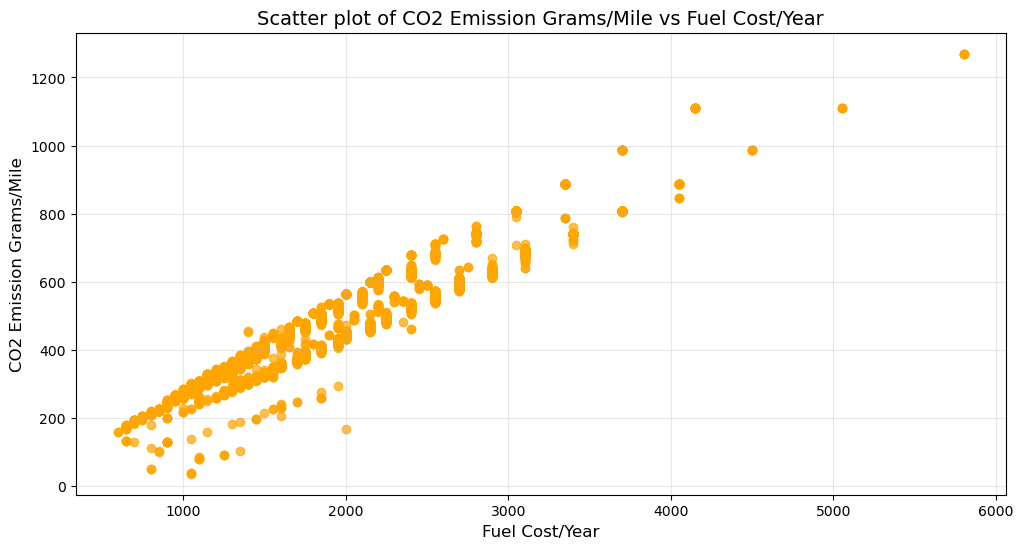

In [70]:
for f in features:
  scatter_plot_corr(vehicles_df[f], vehicles_df[outcome_var], x_label= f, y_label= outcome_var)

**Year vs CO2 Emission Grams/Mile:** Shows a moderate negative relationship. The older the cars, the slightly less CO2 they tend to emit. This can be inferred from the design of older car models, which often had very simple, obstructed exhausts and lower-powered engines.  

**Cylinders vs CO2 Emission Grams/Mile:** Shows a strong positive relationship. The more cylinders a car has, the more CO2 it can emit per mile—obviously, the larger the engine, the higher the emissions.  

**Fuel Barrels/Year vs CO2 Emission Grams/Mile:** Shows a very strong (almost perfect) relationship. The more barrels per year a car consumes, the more CO2 it will emit per mile, which is logical due to the direct link between consumption and expenditure.  

**Combined MPG vs CO2 Emission Grams/Mile:** Shows a very strong negative relationship. The more fuel-efficient a car is, the less CO2 it emits per mile.  

**Fuel Cost/Year vs CO2 Emission Grams/Mile:** Shows an incredibly strong, almost perfect relationship. Cars that cost more in fuel per year also emit more CO2. This is because the annual fuel cost depends directly on consumption, which is directly related to CO2 emissions per mile.

>The variable with most least information is `Fuel Barrels/Year`, so we're gonna use it.

---

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [ ]:
# Your code here.
# We are uusing a simple linear regression model.
X, y= vehicles_df[["Fuel Barrels/Year"]], vehicles_df[[outcome_var]]

X_train, X_test, y_train, y_test= tts(X, y, test_size= .2, random_state= 69)

print(f"X-shape: {X.shape} --- X_train-shape: {X_train.shape} --- X_test-shape: {X_test.shape}")
print(f"y-shape: {y.shape} --- y_train-shape: {y_train.shape} --- y_test-shape: {y_test.shape}")

X-shape: (35952, 1) --- X_train-shape: (28761, 1) --- X_test-shape: (7191, 1)
y-shape: (35952, 1) --- y_train-shape: (28761, 1) --- y_test-shape: (7191, 1)


In [ ]:
# The model predicts CO2 Emission Grams/Mile from Fuel Barrels/Year.
model= LinearRegression()

model.fit(X_train, y_train)

print(model.intercept_, model.coef_)

[12.15150092] [[26.30224178]]


$$
\text{CO2 Emission Grams/Mile} = 12.15 + 26.30 \cdot \text{Fuel Barrels/Year}
$$


Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

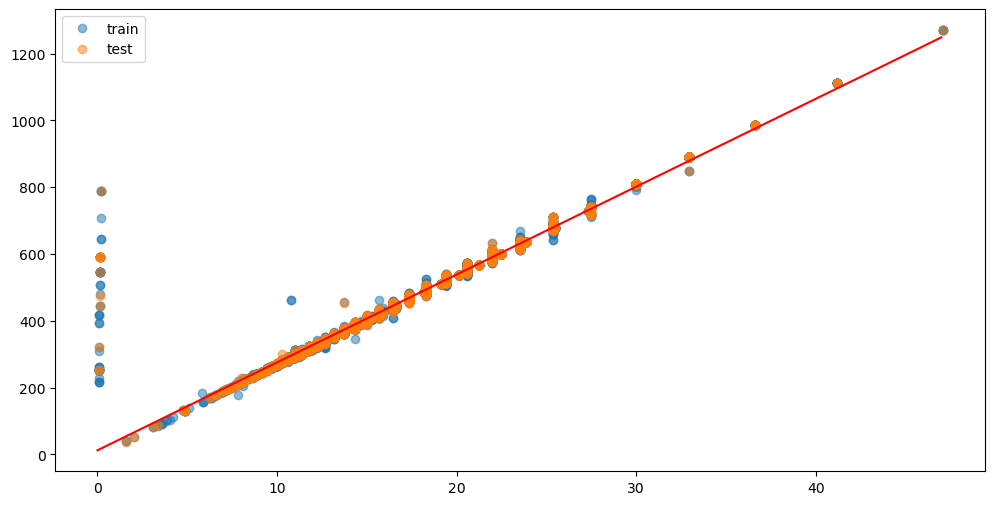

In [74]:
# Your code here.
xmin, xmax = round(X.min().values[0]), round(X.max().values[0])

x_model = np.arange(xmin, xmax+1)
y_model = model.intercept_ + model.coef_[0] * x_model # needed to convert to scalar

plt.figure(figsize= (12, 6))
plt.plot(X_train, y_train, "o", alpha=0.5, label="train") # alpha, transparency value, between 0 (transparent) and 1 (opaque).
plt.plot(X_test, y_test, "o", alpha=0.5, label="test") # alpha, transparency value, between 0 (transparent) and 1 (opaque).
plt.plot(x_model, y_model,'r'); 

plt.legend()
plt.show()

*The most important variables in our study are `Fuel Barrels/Year` and, next to it, `Combined MPG`.*

>$\text{CO2 Emission Grams/Mile} = 12.15 + 26.30 \cdot \text{Fuel Barrels/Year}$

*According to our formula, for each additional barrel of fuel consumed per year, the CO2 emissions per mile increase by approximately 26.30 grams.*


## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [ ]:
# Your code here.

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [ ]:
# Your code here.

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

*your explanation here*

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [ ]:
# Your response here.

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

*your explanation here*